## Advertising Ad Campaign



## 1. Introduction

The task is to predict who will most likely click on the ad. Let's consider that we are working for a marketing company. Firstly, we have to understand what constitutes a profit and a loss.

Let's assume that you have a marketing campaign for which we spend 1000USD per potential customer. For each customer that we target with our ad campaign and that clicks on the ad, we get an overall profit of 100USD. However, if we target a customer that ends up not clicking on the ad, we incur a net loss of 1050USD. Therefore we can conclude that for each customer that was not targeted by the campaign and who clicks on the ad, we get an overall profit of 1100USD. Unfortunately, we have no information about the advertized product; this information could have guided us through our understanding of the user behavior.

In [20]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

## 2. Explore the dataset
    2.1 Explore the data

In [21]:
advertising_df = pd.read_csv('advertising_dsdj.csv')
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


Let's look at the main characteristics of our dataset, such as the number of observations, the type of variables, the summary statistics for each variables, the number of missing data, etc

In [22]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1018 non-null   float64
 1   Age                       1018 non-null   int64  
 2   Area Income               1018 non-null   float64
 3   Daily Internet Usage      1018 non-null   float64
 4   Ad Topic Line             1018 non-null   object 
 5   City                      1018 non-null   object 
 6   Male                      1018 non-null   int64  
 7   Country                   1018 non-null   object 
 8   Timestamp                 1018 non-null   object 
 9   Clicked on Ad             1014 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.7+ KB


In [23]:
advertising_df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad                True
dtype: bool

In [24]:
# Our Target variable contains null values. So we delete these values.
advertising_df = advertising_df.dropna(axis=0)

In [25]:
# Assessing if duplicated records are found in the dataset
print("The number of duplicated records in the dataset:", advertising_df.duplicated().sum())

The number of duplicated records in the dataset: 7


In [26]:
# Removing the duplicated rows from the dataset
advertising_df = advertising_df.drop_duplicates()

## 3. Exploratory Data Analysis
    3.1 Describe Features

In [27]:
# Check for class imbalance
click_rate = advertising_df['Clicked on Ad'].value_counts()

In [28]:
click_rate

1.0    506
0.0    501
Name: Clicked on Ad, dtype: int64

As we can see this is an balanced dataset so there is no issue of class imbalance.

In [29]:
# Descriptive Statistics 
advertising_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,36.958292,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.729539,13458.555374,44.548765,0.499946,0.500242
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


As we can see the mean and the median are fairly same so there is no skwedness in data. Therefore we need not perform any transformation in data. 

But in the age column there is some difference as the min value is negative and max is 999. Lets investigate this stuff.

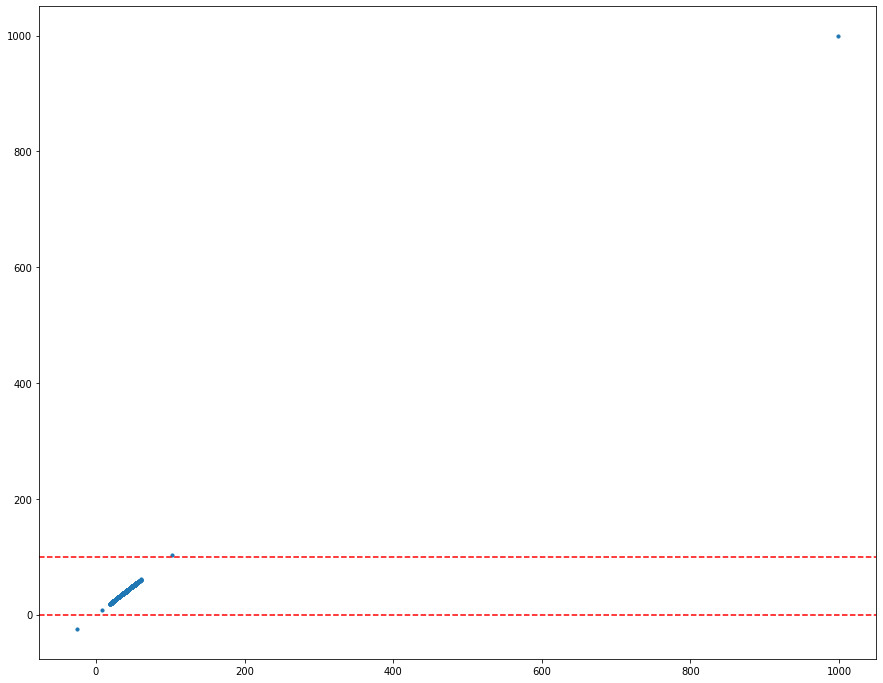

In [30]:
# Keep relevant values in age column.
sorted_age_arr = sorted(advertising_df['Age'])
idx = []
for i in range(len(sorted_age_arr)):
    idx.append(sorted_age_arr[i])

x = idx
y = sorted_age_arr

plt.figure(figsize = (15,12))
plt.scatter(x, y, s=10)
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=100, linestyle='--', color='r')

In [33]:
# This dataset consist of Negative and Positive values which might not be helpful for the prediction. 
advertising_df[(advertising_df['Age'] > 100) | (advertising_df['Age'] < 18)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
294,56.01,-25,46339.25,127.26,Re-engineered real-time success,Garciamouth,0,Tonga,2016-07-05 18:59,1.0
495,50.60,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.20,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [35]:
# Remove extreme age values
advertising_df = advertising_df[(advertising_df['Age'] >= 18) | (advertising_df['Age'] < 100)]

In [36]:
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [37]:
# Let's check out if the 'Daily TIme Spend on Site' 
# is actually smaller or equal to the Daily Internet Usage'

advertising_df['delta'] = advertising_df['Daily Internet Usage'] - advertising_df['Daily Time Spent on Site']
sum(advertising_df['delta'] < 0)

3

In [38]:
# Removing rows with a delta smaller than zero
advertising_df = advertising_df[advertising_df['delta'] >= 0]

# I'll remove the column that I just created, but you could definitely keep it :-) 
advertising_df = advertising_df.drop('delta', axis=1)